In [ ]:
import matplotlib.pyplot as plt
from torchvision import datasets, transforms
import torchvision
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader, random_split
import torch.nn.functional as F
import numpy as np

from sklearn.model_selection import train_test_split
import torch
from sklearn.metrics import confusion_matrix

from sklearn.metrics import accuracy_score, f1_score, precision_score
from sklearn.metrics import recall_score, classification_report
from sklearn.metrics import confusion_matrix, r2_score, mean_squared_error

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Вариант 1

Загрузить файл с информацией о диабетах и построить модель классификации на основе имеющихся данных.

In [ ]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/ML/кр/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
class Dataset_(Dataset):
  def __init__(self, X, y):
    self.X = X.to_numpy(dtype='float32')
    self.y = y.to_numpy()

  def __len__(self):
    return len(self.X)

  def __getitem__(self, idx):
    X = self.X[idx]
    y = self.y[idx]
    return X, y

In [ ]:
X = df.drop(['Outcome'], axis=1)
y = df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=0)

batch_size = 50

train_set = Dataset_(X_train, y_train)
test_set = Dataset_(X_test, y_test)


train_loader = torch.utils.data.DataLoader(train_set,
                                          batch_size=batch_size,
                                          shuffle=True)
test_loader = torch.utils.data.DataLoader(test_set,
                                         batch_size=batch_size,
                                         shuffle=False)

In [ ]:
features, labels=next(iter(train_loader))

fc1 = nn.Linear(8, 5)
x = torch.tanh(fc1(features))

tensor([[-1.0000, -1.0000,  1.0000,  1.0000, -1.0000],
        [-1.0000, -1.0000,  1.0000,  1.0000, -1.0000],
        [-1.0000,  1.0000, -1.0000, -1.0000,  1.0000],
        [-1.0000,  1.0000, -1.0000, -1.0000,  1.0000],
        [-1.0000, -1.0000,  1.0000,  1.0000, -1.0000],
        [-1.0000,  1.0000, -1.0000, -1.0000,  1.0000],
        [-1.0000,  1.0000, -1.0000, -1.0000,  1.0000],
        [-0.7773, -1.0000, -1.0000, -1.0000,  1.0000],
        [-1.0000, -1.0000,  1.0000, -0.7987,  0.3821],
        [-1.0000, -1.0000,  0.9936, -1.0000,  1.0000],
        [-1.0000, -1.0000,  1.0000,  0.1065, -0.9967],
        [-1.0000, -1.0000,  1.0000,  1.0000, -1.0000],
        [-1.0000,  1.0000, -1.0000, -1.0000,  1.0000],
        [-1.0000, -1.0000, -0.4176, -0.9999,  1.0000],
        [-1.0000, -1.0000,  1.0000,  1.0000, -1.0000],
        [-1.0000, -0.7761, -0.8587, -1.0000,  1.0000],
        [-1.0000, -1.0000,  1.0000,  0.9833, -0.9978],
        [-1.0000, -1.0000,  1.0000,  1.0000, -1.0000],
        [-

In [ ]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(8, 50)
        self.fc2 = nn.Linear(50, 30)
        self.fc3 = nn.Linear(30, 15)
        self.fc4 = nn.Linear(15, 2)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        x = self.fc4(x)
        return x

Epoch: 0/3001 | Training loss: 0.699..
Epoch: 500/3001 | Training loss: 0.220..
Epoch: 1000/3001 | Training loss: 0.109..
Epoch: 1500/3001 | Training loss: 0.031..
Epoch: 2000/3001 | Training loss: 0.028..
Epoch: 2500/3001 | Training loss: 0.007..
Epoch: 3000/3001 | Training loss: 0.004..
Finished Training


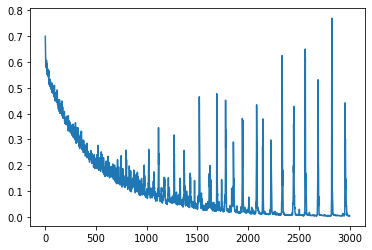

In [ ]:
n_epoch = 3000 + 1
lr=0.001
criterion = nn.CrossEntropyLoss()

model = Net()
optimizer = optim.Adam(model.parameters(), lr = lr)
losses_list = []
log_interval = 500


for epoch in range(n_epoch):
    running_loss = 0
    for features, target in train_loader:
        optimizer.zero_grad()
        output = model.forward(features)
        loss = criterion(output, target.to(torch.long))
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    losses = running_loss/len(train_loader)
    if epoch > 1500:
      lr=0.0001
    if epoch % log_interval == 0:
      print("Epoch: {}/{} |".format(epoch, n_epoch),
            "Training loss: {:.3f}..".format(losses))
    losses_list.append(losses)
print('Finished Training')

plt.plot(range(len(losses_list)), losses_list)
plt.show()

In [ ]:
model.eval() # equivalent with self.train(False)
test_loss = 0
correct = 0
true_list = []
pred_list = []
with torch.no_grad():
    for features, target in test_loader:
        output = model(features)
        test_loss += criterion(output, target.to(torch.long))
        _, pred = torch.max(output, 1)
        true_list += target.numpy().tolist()
        pred_list += np.squeeze(pred.numpy()).tolist()


print('accuracy_score ', accuracy_score(true_list, pred_list))
print('f1_score ', f1_score(true_list, pred_list))
print('precision_score ', f1_score(true_list, pred_list))
print('recall_score ', f1_score(true_list, pred_list))

print(f'Avg. loss: {test_loss:.4f}')

accuracy_score  1.0
f1_score  1.0
precision_score  1.0
recall_score  1.0
Avg. loss: 0.0541


# Вариант 2

Загрузить файлы и информацией о лицах, перевести в тензорный формат и построить модель классификации.

In [ ]:
import numpy as np
from PIL import Image

images = np.load('/content/drive/MyDrive/ML/кр/olivetti_faces.npy')
target = np.load('/content/drive/MyDrive/ML/кр/olivetti_faces_target.npy')

Выведем форму произвольного изображения:

In [ ]:
images[359].shape

(64, 64)

Выведем произвольное изображение из датасета

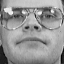

In [ ]:
im = Image.fromarray(images[359] * 256)
new_im = im.convert('RGB')

display(new_im)

In [ ]:
class Dataset_(Dataset):
  def __init__(self, X, y):
    self.X = X
    self.y = y

  def __len__(self):
    return len(self.X)

  def __getitem__(self, idx):
    X = self.X[idx]
    y = self.y[idx]
    return X, y

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(images, target, test_size=.2, random_state=0)

batch_size = 50

train_set = Dataset_(X_train, y_train)
test_set = Dataset_(X_test, y_test)

train_set[0]


train_loader = torch.utils.data.DataLoader(train_set,
                                          batch_size=batch_size,
                                          shuffle=True)
test_loader = torch.utils.data.DataLoader(test_set,
                                         batch_size=batch_size,
                                         shuffle=False)

In [ ]:
display(len(np.unique(target)))
np.unique(target)

40

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39], dtype=int32)

In [ ]:
features, labels=next(iter(test_loader))
ex1 = features[0]
ex1 = torch.unsqueeze(ex1, 0)
print('ex1:', ex1.shape)

conv1 = nn.Conv2d(1, 60, kernel_size=5)
ex2 = F.max_pool2d(conv1(ex1), 2)
print('ex2:', ex2.shape)

conv2 = nn.Conv2d(60, 120, kernel_size=5)
ex3 = F.max_pool2d(conv2(ex2), 2)
print('ex4:', ex3.shape)


ex1: torch.Size([1, 64, 64])
ex2: torch.Size([60, 30, 30])
ex4: torch.Size([120, 13, 13])


In [ ]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 30, kernel_size=5)
        self.conv2 = nn.Conv2d(30, 64, kernel_size=5)
        self.fc1 = nn.Linear(64*13*13, 60)
        self.fc2 = nn.Linear(60, 50)
        self.fc3 = nn.Linear(50, 40)

    def forward(self, x):
        x = F.max_pool2d(F.relu(self.conv1(x)), 2)
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        x = x.view(-1, 64*13*13)
        x = torch.tanh(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x


Epoch: 0/36 | Training loss: 3.703..
Epoch: 5/36 | Training loss: 3.311..
Epoch: 10/36 | Training loss: 2.353..
Epoch: 15/36 | Training loss: 1.334..
Epoch: 20/36 | Training loss: 0.631..
Epoch: 25/36 | Training loss: 0.279..
Epoch: 30/36 | Training loss: 0.140..
Epoch: 35/36 | Training loss: 0.076..
Finished Training


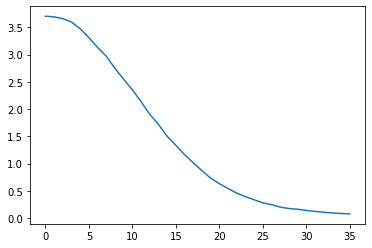

In [ ]:
n_epoch = 35 + 1
lr=0.001
criterion = nn.CrossEntropyLoss()

model = Net()
optimizer = optim.Adam(model.parameters(), lr = lr)
losses_list = []
log_interval = 5

for epoch in range(n_epoch):
    running_loss = 0
    for images, target in train_loader:
        images = torch.unsqueeze(images, 1)
        optimizer.zero_grad()
        output = model.forward(images)
        loss = criterion(output, target.to(torch.long))
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    losses = running_loss/len(train_loader)
    if epoch % log_interval == 0:
      print("Epoch: {}/{} |".format(epoch, n_epoch),
            "Training loss: {:.3f}..".format(losses))
    losses_list.append(losses)
print('Finished Training')


plt.plot(range(len(losses_list)), losses_list)
plt.show()

In [ ]:
model.eval()
test_loss = 0
true_list = []
pred_list = []
result_ = {}
result_v = {}

with torch.no_grad():
    for images, target in test_loader:
        images = torch.unsqueeze(images, 1)
        output = model(images)
        test_loss += criterion(output, target.to(torch.long))
        _, pred = torch.max(output, 1)
        correct = pred.eq(target.view_as(pred))

        for i in range(target.shape[0]):
            target_i = target[i].item()
            try:
              result_v[target_i] += 1
            except:
              result_v[target_i] = 1
            try:
              result_[target_i] += 1
            except:
              result_[target_i] = int(correct[i].item())
        true_list += target.numpy().tolist()
        pred_list += np.squeeze(pred.numpy()).tolist()


print('Точность ', accuracy_score(true_list, pred_list))
print(f'Avg. loss: {test_loss:.4f}')

Точность  1.0
Avg. loss: 0.4919


In [ ]:
for i in range(40):
    print(f'n{i} => {result_[i]/result_v[i]:.2f}({result_[i]}/{result_v[i]})')

n0 => 1.00(5/5)
n1 => 1.00(6/6)
n2 => 1.00(8/8)
n3 => 1.00(9/9)
n4 => 1.00(9/9)
n5 => 1.00(7/7)
n6 => 1.00(7/7)
n7 => 1.00(7/7)
n8 => 1.00(10/10)
n9 => 1.00(9/9)
n10 => 1.00(7/7)
n11 => 1.00(9/9)
n12 => 1.00(9/9)
n13 => 1.00(8/8)
n14 => 1.00(6/6)
n15 => 1.00(7/7)
n16 => 1.00(10/10)
n17 => 1.00(4/4)
n18 => 1.00(10/10)
n19 => 1.00(7/7)
n20 => 1.00(9/9)
n21 => 1.00(9/9)
n22 => 1.00(9/9)
n23 => 1.00(9/9)
n24 => 1.00(8/8)
n25 => 1.00(9/9)
n26 => 1.00(7/7)
n27 => 1.00(9/9)
n28 => 1.00(8/8)
n29 => 1.00(7/7)
n30 => 1.00(7/7)
n31 => 1.00(7/7)
n32 => 1.00(8/8)
n33 => 1.00(9/9)
n34 => 1.00(7/7)
n35 => 1.00(9/9)
n36 => 1.00(8/8)
n37 => 1.00(8/8)
n38 => 1.00(10/10)
n39 => 1.00(9/9)


# Вариант 3

Построить модель линейной регрессии на имеющихся данных

In [ ]:
import matplotlib.pyplot as plt

df_x = pd.read_csv('/content/drive/MyDrive/ML/кр/x.csv')
df_y = pd.read_csv('/content/drive/MyDrive/ML/кр/y.csv')
df_x.head()

,Unnamed: 0,0
0,0,1.462108
1,1,1.133769
2,2,-2.301539
3,3,1.744812
4,4,0.042214


In [ ]:
df_y.head()

,Unnamed: 0,0
0,0,101.159902
1,1,78.442913
2,2,-159.238195
3,3,120.719533
4,4,2.920673


In [ ]:
df_x = df_x.rename({'Unnamed: 0': "first"}, axis=1)
df_y = df_y.rename({'Unnamed: 0': "first"}, axis=1)

res = pd.merge(df_x, df_y, on = 'first' ) # , on=0)

In [ ]:
df_res = res.iloc[:, [1,2]]
df_res.head()

,0_x,0_y
0,1.462108,101.159902
1,1.133769,78.442913
2,-2.301539,-159.238195
3,1.744812,120.719533
4,0.042214,2.920673


Зашумим входные данные

In [ ]:
noise = np.random.randint(-100, 340, size=20) / 10
df_res['0_y'] = df_res['0_y'] + noise

<ipython-input-203-aa757312d54a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_res['0_y'] = df_res['0_y'] + noise


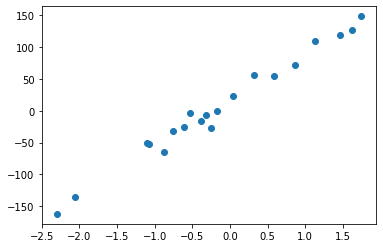

In [ ]:
plt.figure()
plt.scatter(df_res['0_x'], df_res['0_y'])
plt.show()

In [ ]:
class Dataset_(Dataset):
  def __init__(self, X, y):
    self.X = X.to_numpy(dtype='float32')
    self.y = y.to_numpy()

  def __len__(self):
    return len(self.X)

  def __getitem__(self, idx):
    X = self.X[idx]
    y = self.y[idx]
    return X, y

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_res['0_x'], df_res['0_y'], test_size=.2, random_state=0)

batch_size = 50

train_set = Dataset_(X_train, y_train)
test_set = Dataset_(X_test, y_test)

train_set[0]


train_loader = torch.utils.data.DataLoader(train_set,
                                          batch_size=batch_size,
                                          shuffle=True)
test_loader = torch.utils.data.DataLoader(test_set,
                                         batch_size=batch_size,
                                         shuffle=False)

In [ ]:
features, target = next(iter(train_loader))
features

tensor([-0.1724,  0.8654,  0.3190,  0.0422, -1.0730,  1.7448,  1.6243, -2.3015,
        -0.3841, -0.7612,  1.4621, -0.3224, -0.2494, -0.6118, -1.0999, -0.5282])

In [ ]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(1, 60)
        self.fc2 = nn.Linear(60, 30)
        self.fc3 = nn.Linear(30, 1)
        self.drop1 = nn.Dropout(0.50)
        self.drop2 = nn.Dropout(0.15)

    def forward(self, x):
        x = self.drop1(self.fc1(x))
        x = self.drop2(self.fc2(x))
        x = self.fc3(x)
        return x

Epoch: 0/25001 | Training loss: 5913.810..
Epoch: 5000/25001 | Training loss: 247.880..
Epoch: 10000/25001 | Training loss: 281.761..
Epoch: 15000/25001 | Training loss: 328.535..
Epoch: 20000/25001 | Training loss: 255.462..
Epoch: 25000/25001 | Training loss: 282.126..
Finished Training


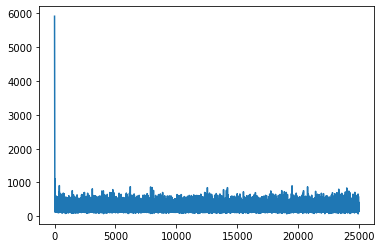

In [ ]:
n_epoch = 25000 + 1

lr=0.009
criterion = nn.MSELoss()

model1 = Net()
optimizer = optim.Adam(model1.parameters(), lr = lr)
losses_list = []
log_interval = 5000


for epoch in range(n_epoch):
    running_loss = 0
    for features, target in train_loader:
        optimizer.zero_grad()
        output = model1.forward(features.view(-1, 1).float())
        loss = criterion(output, target.view(-1, 1).float())
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    losses = running_loss/len(train_loader)
    if epoch > 10000:
      lr=0.002
    elif epoch > 20000:
      lr=0.0005
    if epoch % log_interval == 0:
      print("Epoch: {}/{} |".format(epoch, n_epoch),
            "Training loss: {:.3f}..".format(losses))
    losses_list.append(losses)
print('Finished Training')

plt.plot(range(len(losses_list)), losses_list)
plt.show()

In [ ]:
model1.eval()
true_list = []
pred_list = []
with torch.no_grad():
    for features, target in test_loader:
        output = model1(features.view(-1, 1).float())
        true_list += target.numpy().tolist()
        pred_list += np.squeeze(output.numpy()).tolist()

print('r2_score ', r2_score(true_list, pred_list))
print('mean_squared_error ', mean_squared_error(true_list, pred_list))

r2_score  0.9826482475701521
mean_squared_error  161.56900818330442
